In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime, os


In [2]:
df = pd.read_csv('244400404_effectifs-eleves-cleaned')
df.head()

,RowNo,Type de site,Date,Prévision,Réel,Nom du site,An,RéelMed,RéelNorm
0,0,M/E,2011-09-06,290.0,271.0,LEDRU ROLLIN/SARAH BERNHARDT,2011,308.0,0.879870
1,1,M/E,2011-09-05,95.0,102.0,BEAUJOIRE,2011,129.0,0.790698
2,2,M/E,2011-09-05,167.0,171.0,CONTRIE,2011,211.0,0.810427
3,3,M,2011-09-05,80.0,64.0,COUDRAY M.,2011,77.0,0.831169
4,4,M,2011-09-05,73.0,77.0,FONTENY,2011,92.0,0.836957


In [3]:
df['datetime']= df['Date'].apply( lambda string1 :datetime.datetime.strptime(string1,"%Y-%m-%d"))
df['joursem']= df['Date'].apply( lambda string1 :datetime.datetime.strptime(string1,"%Y-%m-%d").weekday())
df['isoweek']= df['Date'].apply( lambda string1 :datetime.datetime.strptime(string1,"%Y-%m-%d").isocalendar().week)

In [4]:
df.head()

,RowNo,Type de site,Date,Prévision,Réel,Nom du site,An,RéelMed,RéelNorm,datetime,joursem,isoweek
0,0,M/E,2011-09-06,290.0,271.0,LEDRU ROLLIN/SARAH BERNHARDT,2011,308.0,0.879870,2011-09-06,1,36
1,1,M/E,2011-09-05,95.0,102.0,BEAUJOIRE,2011,129.0,0.790698,2011-09-05,0,36
2,2,M/E,2011-09-05,167.0,171.0,CONTRIE,2011,211.0,0.810427,2011-09-05,0,36
3,3,M,2011-09-05,80.0,64.0,COUDRAY M.,2011,77.0,0.831169,2011-09-05,0,36
4,4,M,2011-09-05,73.0,77.0,FONTENY,2011,92.0,0.836957,2011-09-05,0,36


In [12]:
df_calend=pd.read_csv('calendrier_saisons_vacances')
df_calend['datetime']= df_calend['datetime'].apply( lambda string1 :datetime.datetime.strptime(string1,"%Y-%m-%d"))
df_calend.head()

,Unnamed: 0,datetime,Saison,Problème,durée_DepuisVac,durée_AvantVac
0,0,2011-01-03,1,False,1,54
1,1,2011-01-04,1,False,2,53
2,2,2011-01-06,1,False,4,51
3,3,2011-01-07,1,False,5,50
4,4,2011-01-10,1,False,8,47


In [14]:
df=pd.merge(df, df_calend, how='left', on='datetime')
df.head()

,RowNo,Type de site,Date,Prévision,Réel,Nom du site,An,RéelMed,RéelNorm,datetime,joursem,isoweek,Unnamed: 0,Saison,Problème,durée_DepuisVac,durée_AvantVac
0,0,M/E,2011-09-06,290.0,271.0,LEDRU ROLLIN/SARAH BERNHARDT,2011,308.0,0.879870,2011-09-06,1,36,92,4,False,2,46
1,1,M/E,2011-09-05,95.0,102.0,BEAUJOIRE,2011,129.0,0.790698,2011-09-05,0,36,91,4,False,1,47
2,2,M/E,2011-09-05,167.0,171.0,CONTRIE,2011,211.0,0.810427,2011-09-05,0,36,91,4,False,1,47
3,3,M,2011-09-05,80.0,64.0,COUDRAY M.,2011,77.0,0.831169,2011-09-05,0,36,91,4,False,1,47
4,4,M,2011-09-05,73.0,77.0,FONTENY,2011,92.0,0.836957,2011-09-05,0,36,91,4,False,1,47


In [15]:
df[['Saison','RéelNorm']].groupby('Saison').mean()

,RéelNorm
Saison,
1,0.980227
2,0.999804
3,0.958419
4,1.012556
5,1.022908


In [16]:
df[['Saison','RéelNorm']].groupby('Saison').median()

,RéelNorm
Saison,
1,0.987500
2,1.000000
3,0.988235
4,1.011976
5,1.016043


<AxesSubplot:xlabel='durée_DepuisVac'>

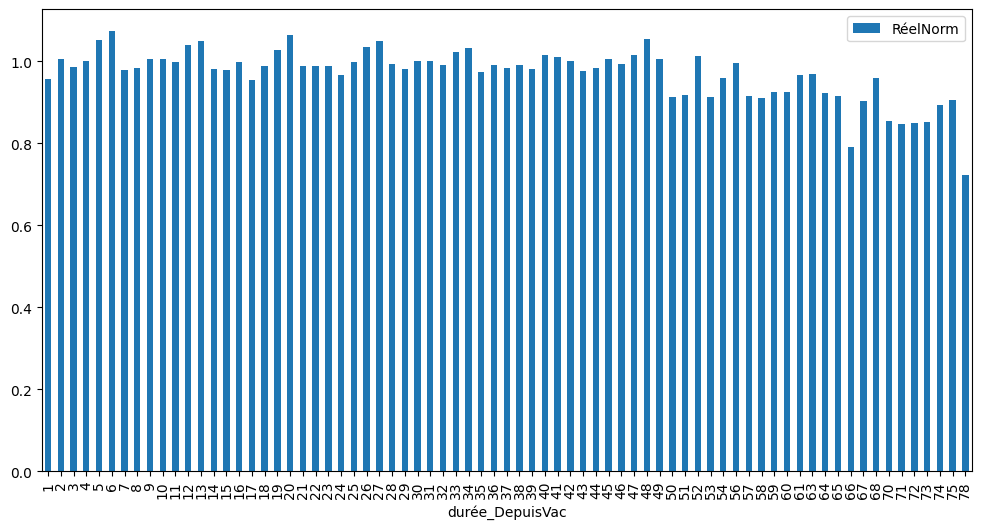

In [21]:
df[['durée_DepuisVac','RéelNorm']].groupby('durée_DepuisVac').mean().plot.bar(figsize=(12,6))

<AxesSubplot:xlabel='durée_DepuisVac'>

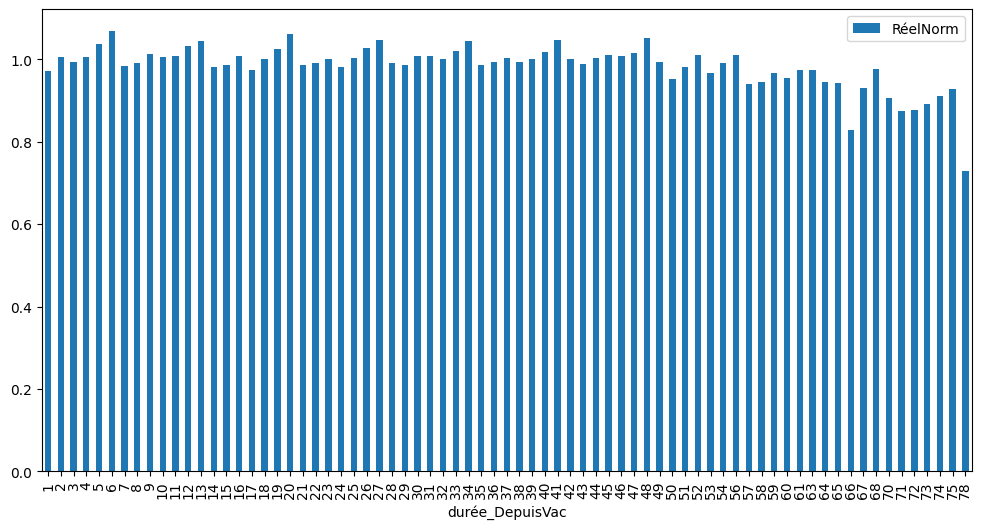

In [22]:
df[['durée_DepuisVac','RéelNorm']].groupby('durée_DepuisVac').median().plot.bar(figsize=(12,6))

<AxesSubplot:xlabel='durée_AvantVac'>

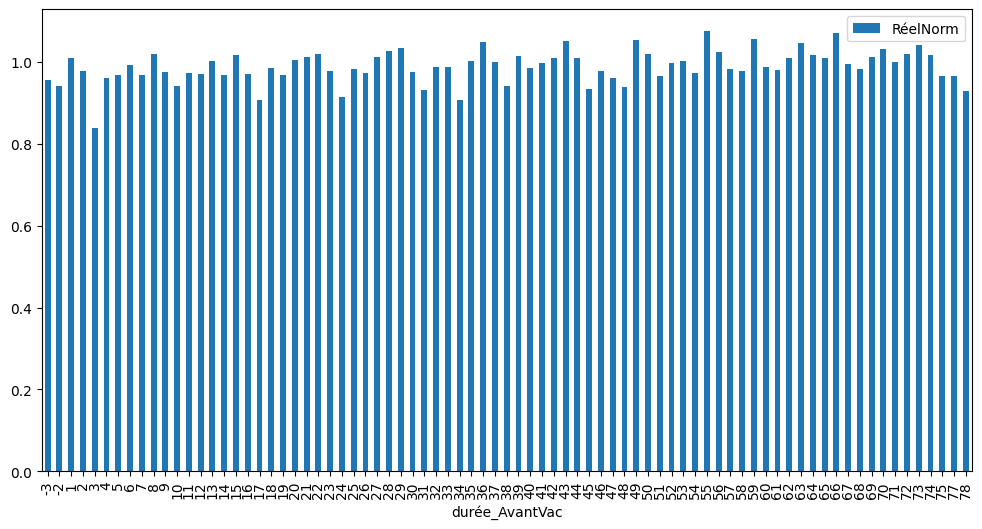

In [24]:
df[['durée_AvantVac','RéelNorm']].groupby('durée_AvantVac').mean().plot.bar(figsize=(12,6))

<AxesSubplot:xlabel='durée_AvantVac'>

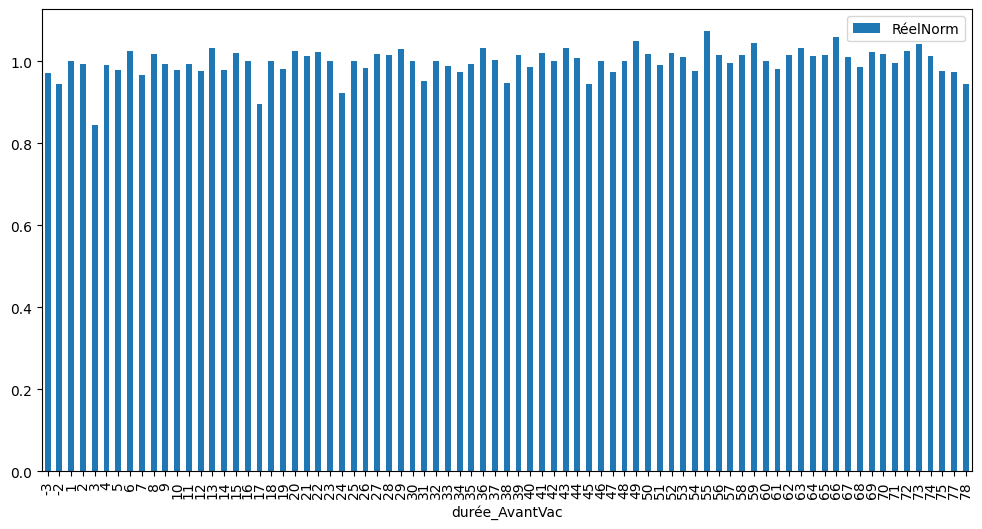

In [25]:
df[['durée_AvantVac','RéelNorm']].groupby('durée_AvantVac').median().plot.bar(figsize=(12,6))

<AxesSubplot:xlabel='durée_AvantVac'>

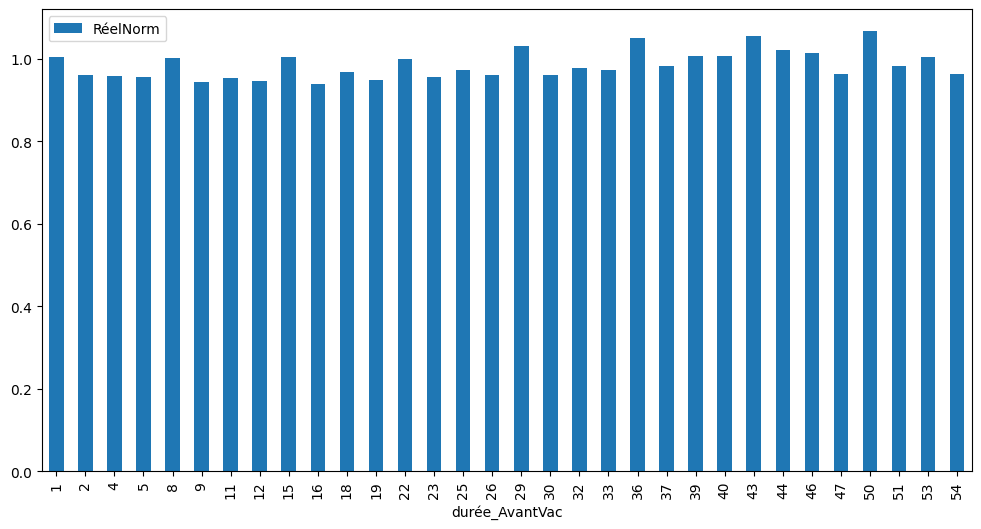

In [28]:
df[df['Saison']==1][['durée_AvantVac','RéelNorm']].groupby('durée_AvantVac').mean().plot.bar(figsize=(12,6))

<AxesSubplot:xlabel='durée_AvantVac'>

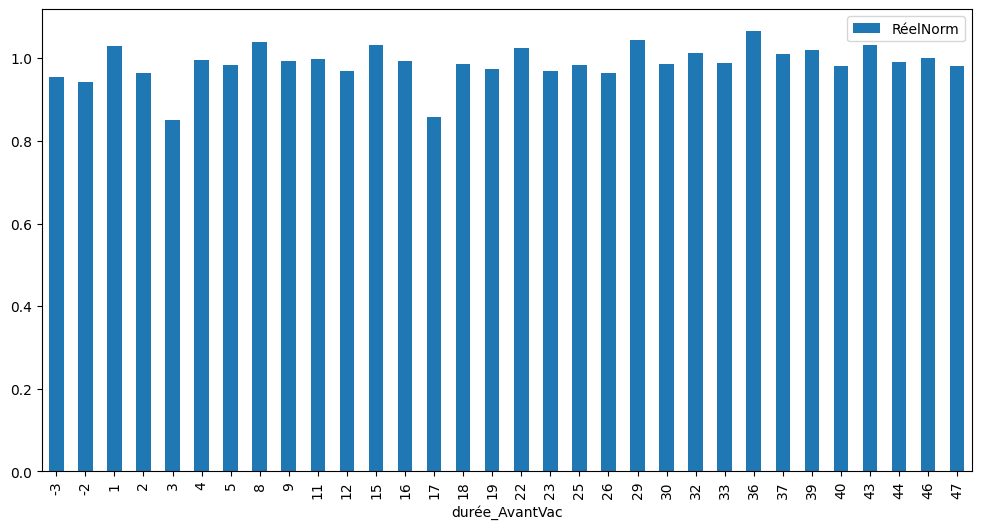

In [29]:
df[df['Saison']==2][['durée_AvantVac','RéelNorm']].groupby('durée_AvantVac').mean().plot.bar(figsize=(12,6))

<AxesSubplot:xlabel='durée_AvantVac'>

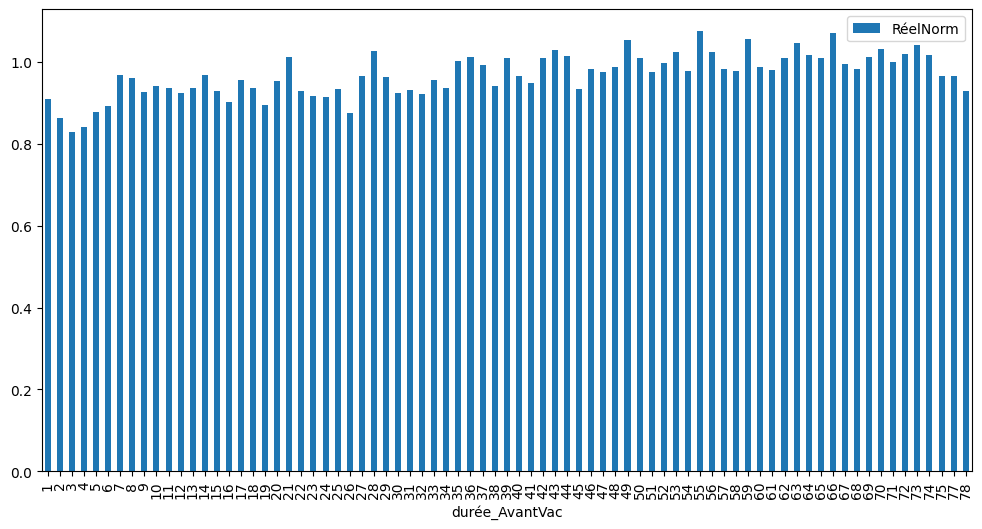

In [30]:
df[df['Saison']==3][['durée_AvantVac','RéelNorm']].groupby('durée_AvantVac').mean().plot.bar(figsize=(12,6))

<AxesSubplot:xlabel='durée_AvantVac'>

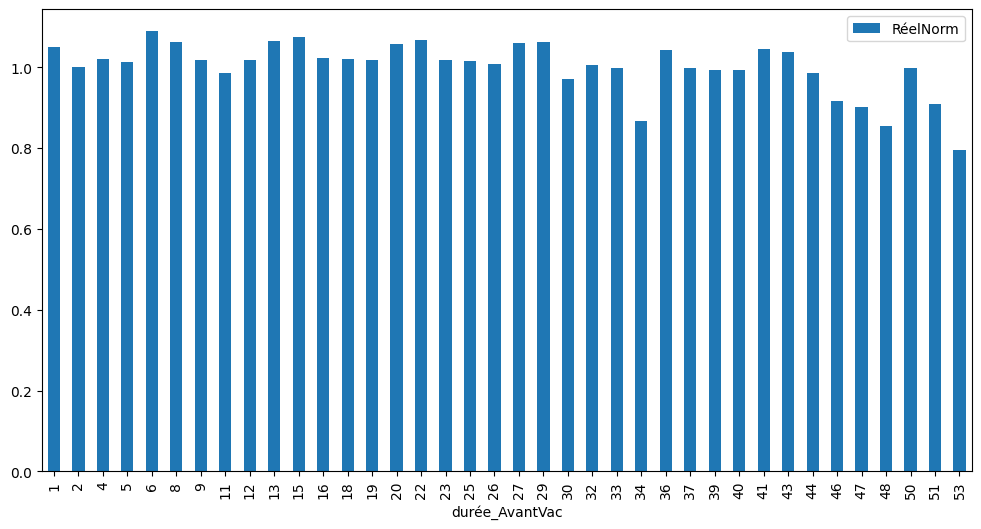

In [31]:
df[df['Saison']==4][['durée_AvantVac','RéelNorm']].groupby('durée_AvantVac').mean().plot.bar(figsize=(12,6))

<AxesSubplot:xlabel='durée_AvantVac'>

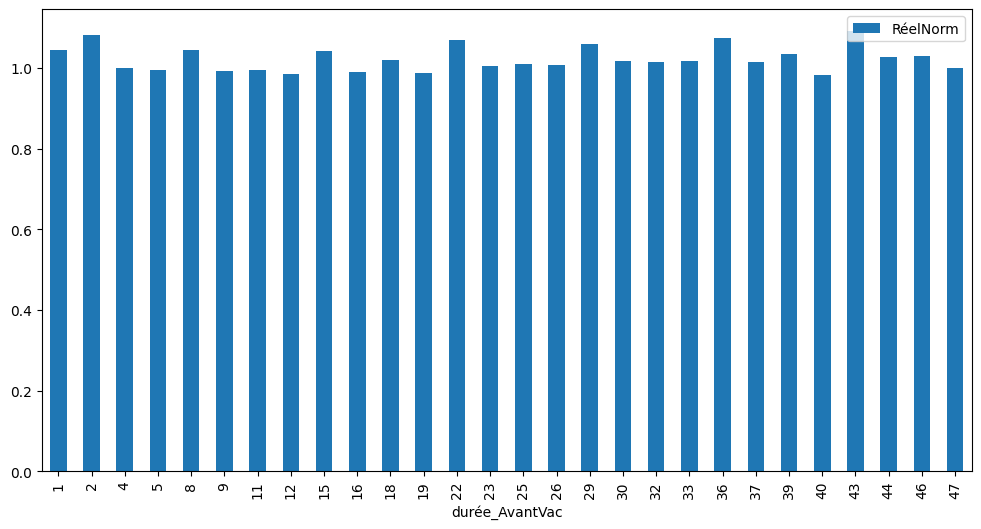

In [32]:
df[df['Saison']==5][['durée_AvantVac','RéelNorm']].groupby('durée_AvantVac').mean().plot.bar(figsize=(12,6))

<AxesSubplot:xlabel='durée_DepuisVac'>

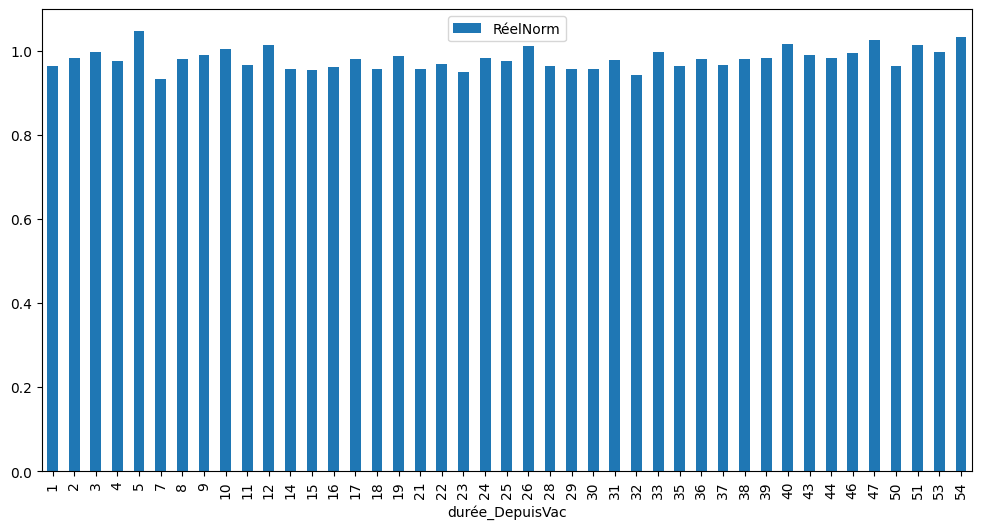

In [33]:
df[df['Saison']==1][['durée_DepuisVac','RéelNorm']].groupby('durée_DepuisVac').mean().plot.bar(figsize=(12,6))

<AxesSubplot:xlabel='durée_DepuisVac'>

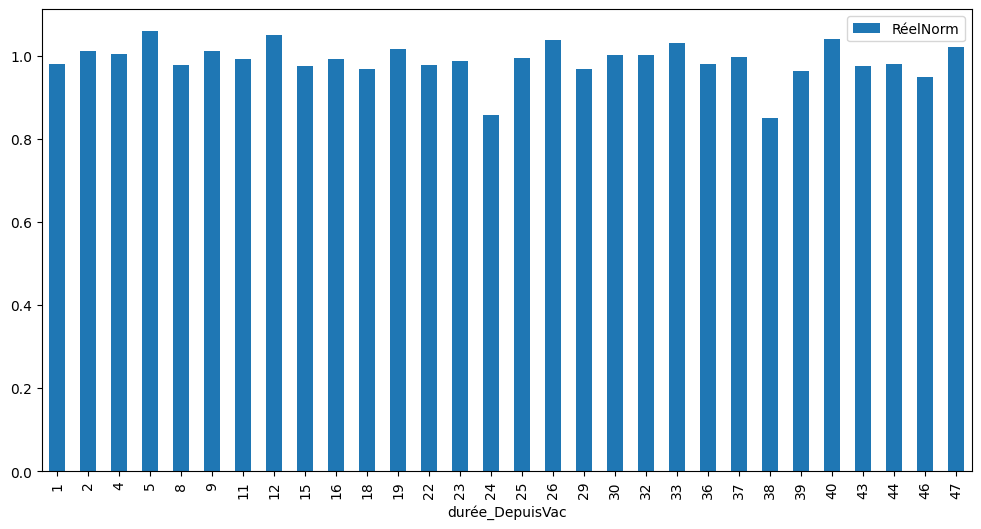

In [34]:
df[df['Saison']==2][['durée_DepuisVac','RéelNorm']].groupby('durée_DepuisVac').mean().plot.bar(figsize=(12,6))

<AxesSubplot:xlabel='durée_DepuisVac'>

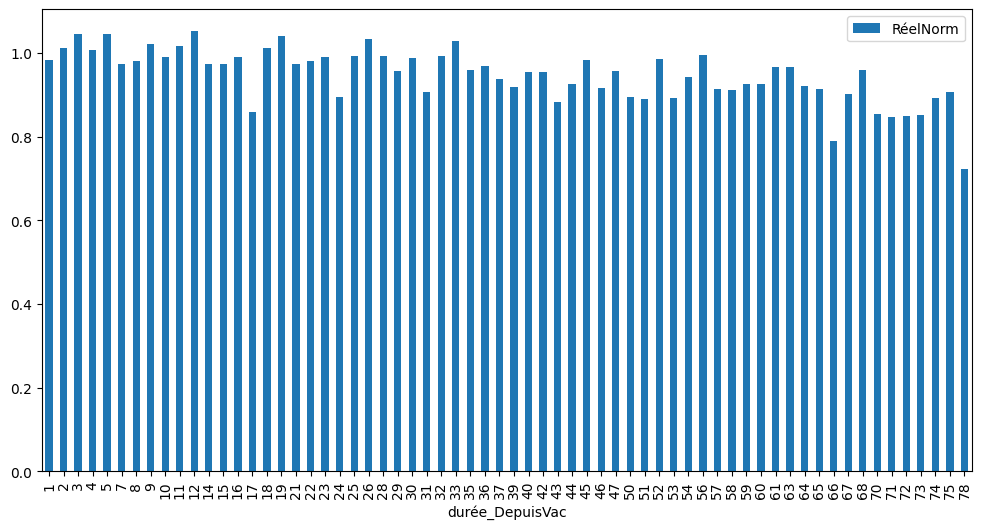

In [35]:
df[df['Saison']==3][['durée_DepuisVac','RéelNorm']].groupby('durée_DepuisVac').mean().plot.bar(figsize=(12,6))

<AxesSubplot:xlabel='durée_DepuisVac'>

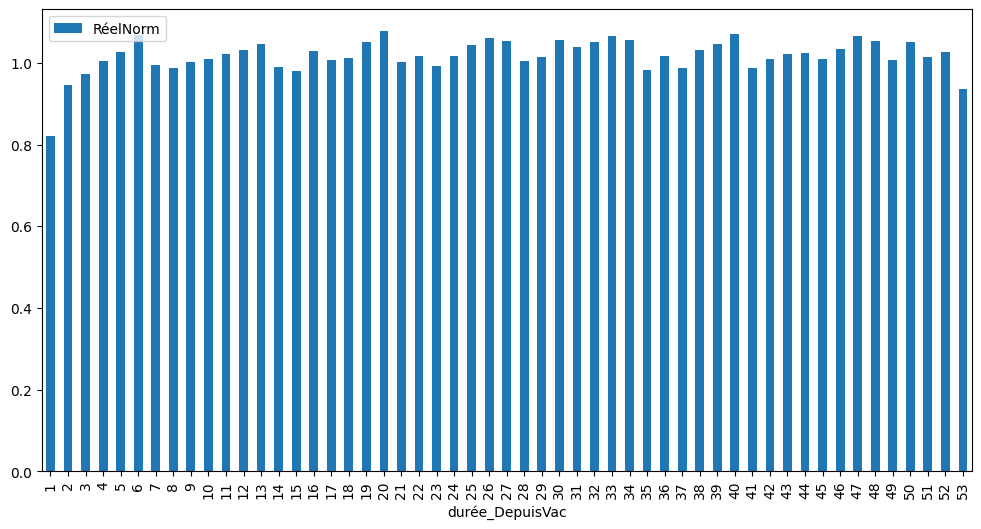

In [36]:
df[df['Saison']==4][['durée_DepuisVac','RéelNorm']].groupby('durée_DepuisVac').mean().plot.bar(figsize=(12,6))

<AxesSubplot:xlabel='durée_DepuisVac'>

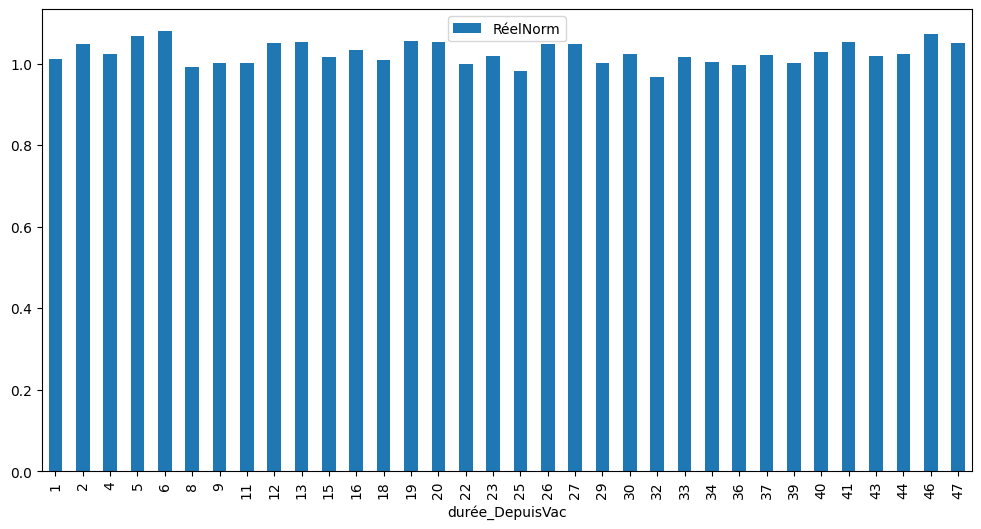

In [37]:
df[df['Saison']==5][['durée_DepuisVac','RéelNorm']].groupby('durée_DepuisVac').mean().plot.bar(figsize=(12,6))